# Applied Machine Learning- Part 4: Supervised learning 2

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

from sklearn.naive_bayes import GaussianNB
from myplt import plot_class_regions_for_classifier

<IPython.core.display.Javascript object>


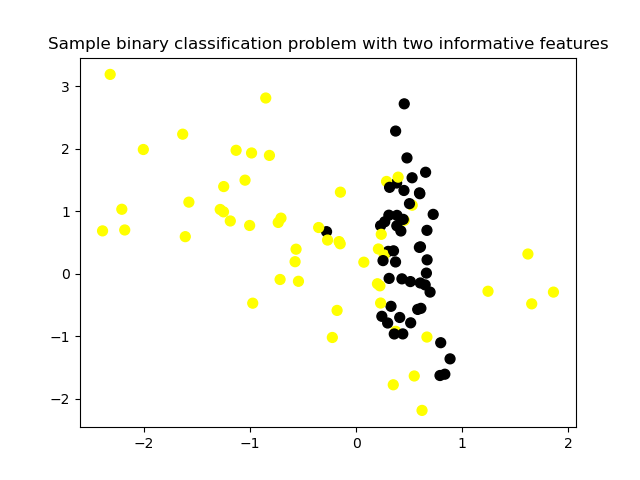

In [2]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

### Gaussian Naive Bayes Classifier

<IPython.core.display.Javascript object>


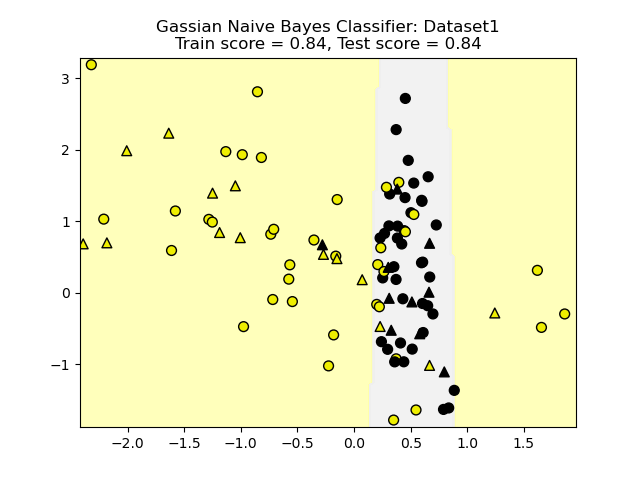

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gassian Naive Bayes Classifier: Dataset1')

In [5]:
from sklearn.datasets import load_breast_cancer

In [6]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
#plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test, 'Gassian Naive Bayes Classifier: Dataset1')
nbclf.score(X_test, y_test)

0.9370629370629371

#### It assumes features are not correlated with each other that is not realistic for more datasets but it works for high dimensional datasets including text.

### Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>


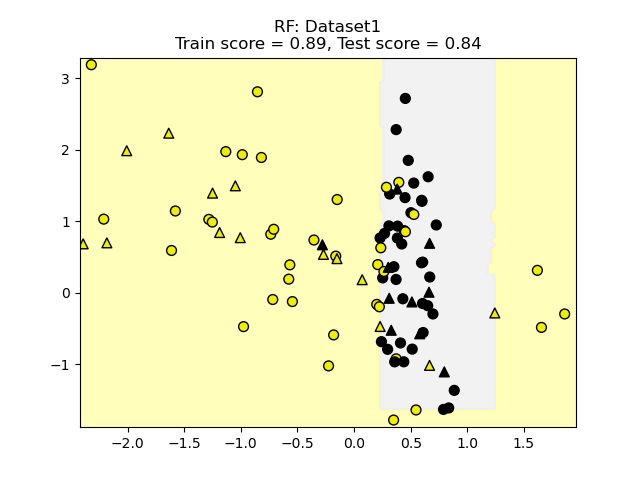

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0).fit(X_train, y_train)
plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test, 'RF: Dataset1')

#### RF classifier for real-world breaset cancer dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = RandomForestClassifier(max_depth=8, random_state=0).fit(X_train, y_train)

print('Train score = {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score = {:.2f}'.format(clf.score(X_test, y_test)))

Train score = 1.00
Test score = 0.97


### Gradient-boosted decision trees (GBDT)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

<IPython.core.display.Javascript object>


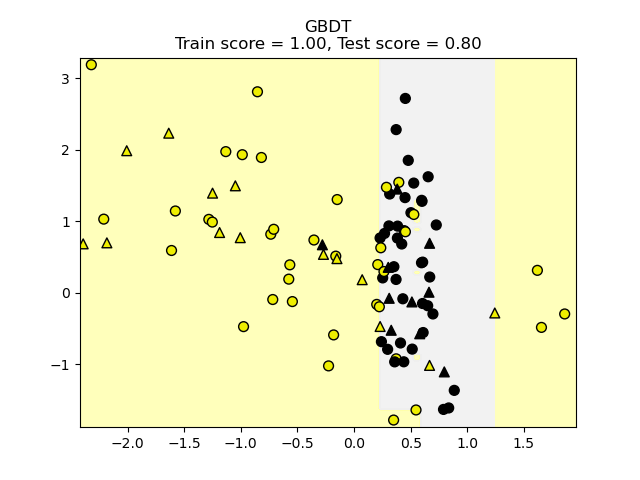

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

clf = GradientBoostingClassifier().fit(X_train, y_train)   # dafault: alpha = 0.1, n_estimators = 100, max_depth = 3

plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test, 'GBDT')

#### GBDT classifier for real-world breaset cancer dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0)

clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0).fit(X_train, y_train)

print('Train score = {:.2f}'.format(clf.score(X_train, y_train)))
print('Test score = {:.2f}'.format(clf.score(X_test, y_test)))

Train score = 0.97
Test score = 0.97


#### Can reduce max_depth and/or learning_rate to avoid overfitting.

## Neural Networks

<IPython.core.display.Javascript object>


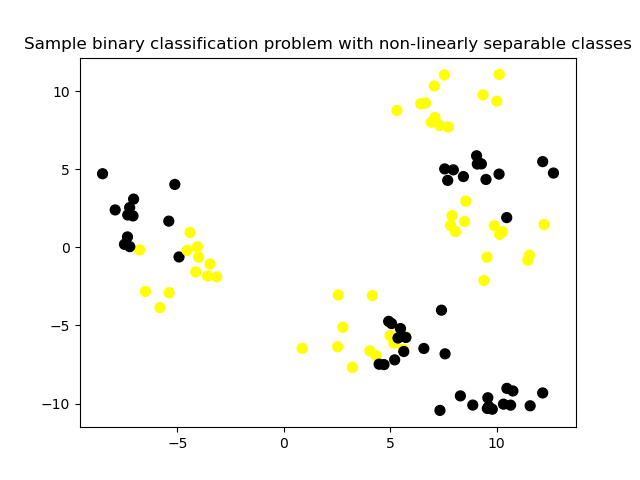

In [14]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>


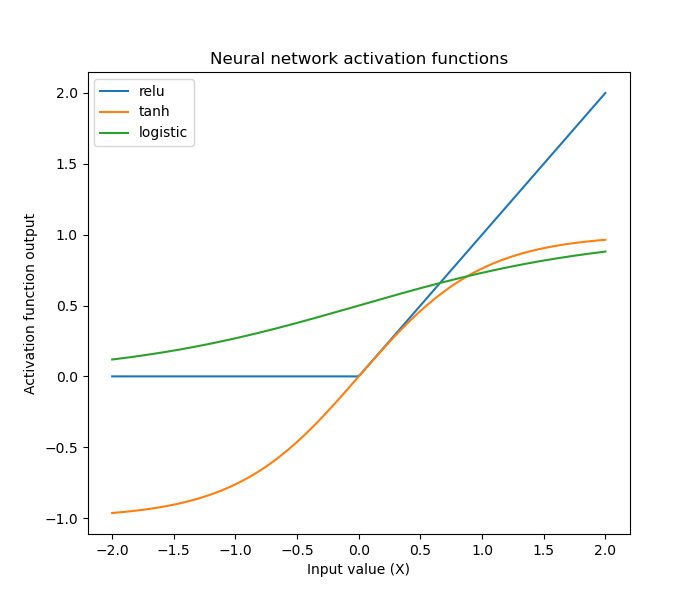

In [15]:
Xrange = np.linspace(-2,2,200)

plt.figure(figsize=(7,6))
plt.plot(Xrange, np.maximum(Xrange,0), label='relu')
plt.plot(Xrange, np.tanh(Xrange), label='tanh')
plt.plot(Xrange, 1 / (1+np.exp(-Xrange)), label='logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (X)')
plt.ylabel('Activation function output')
plt.show()

### NN Classification

In [17]:
from sklearn.neural_network import MLPClassifier
from myplt import plot_class_regions_for_classifier_subplot

#### synthetic dataset1: single hidden layer

<IPython.core.display.Javascript object>


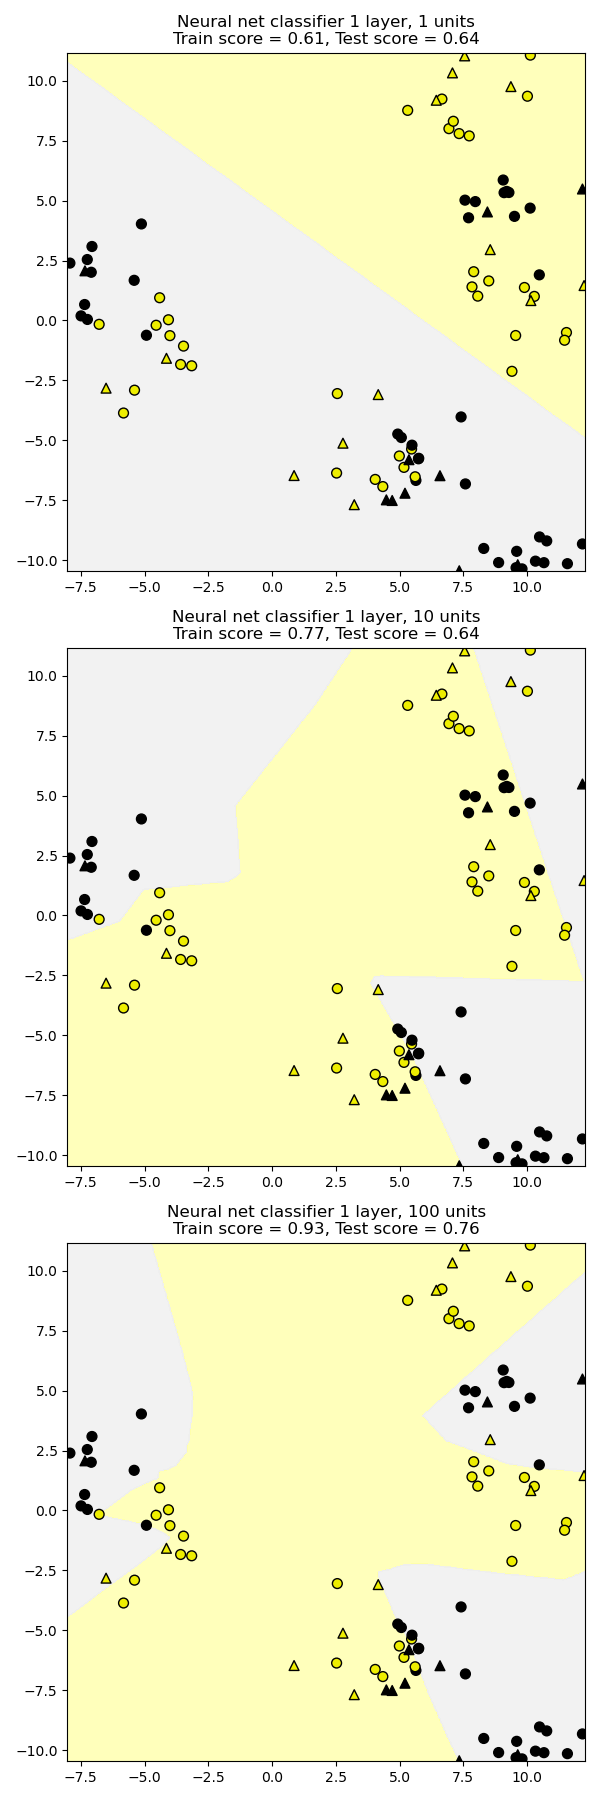

C:\Users\sajad\AppData\Local\Temp\ipykernel_14108\3418442192.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sajad\AppData\Local\Temp\ipykernel_14108\3418442192.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for units, axis in zip([1, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs', random_state=0).fit(X_train, y_train)
    title = 'Neural net classifier 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()

#### synthetic dataset1: two hidden layer

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<IPython.core.display.Javascript object>


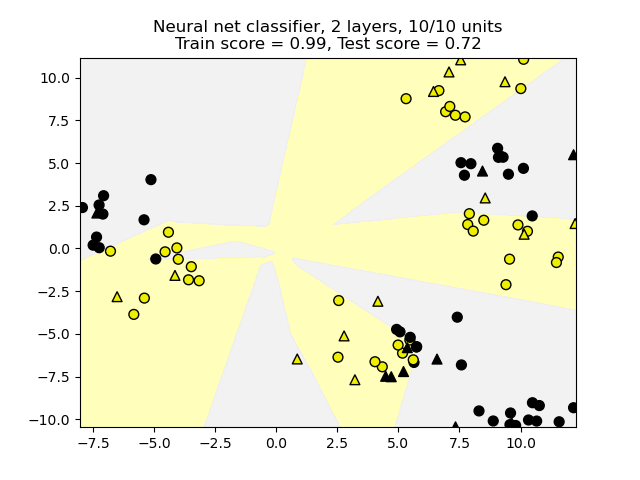

In [19]:
nnclf2 = MLPClassifier(hidden_layer_sizes = [10,10], solver='lbfgs', random_state=0).fit(X_train, y_train)
plot_class_regions_for_classifier(nnclf2, X_train, y_train, X_test, y_test, 'Neural net classifier, 2 layers, 10/10 units')

#### Regularization parameter: alpha

<IPython.core.display.Javascript object>


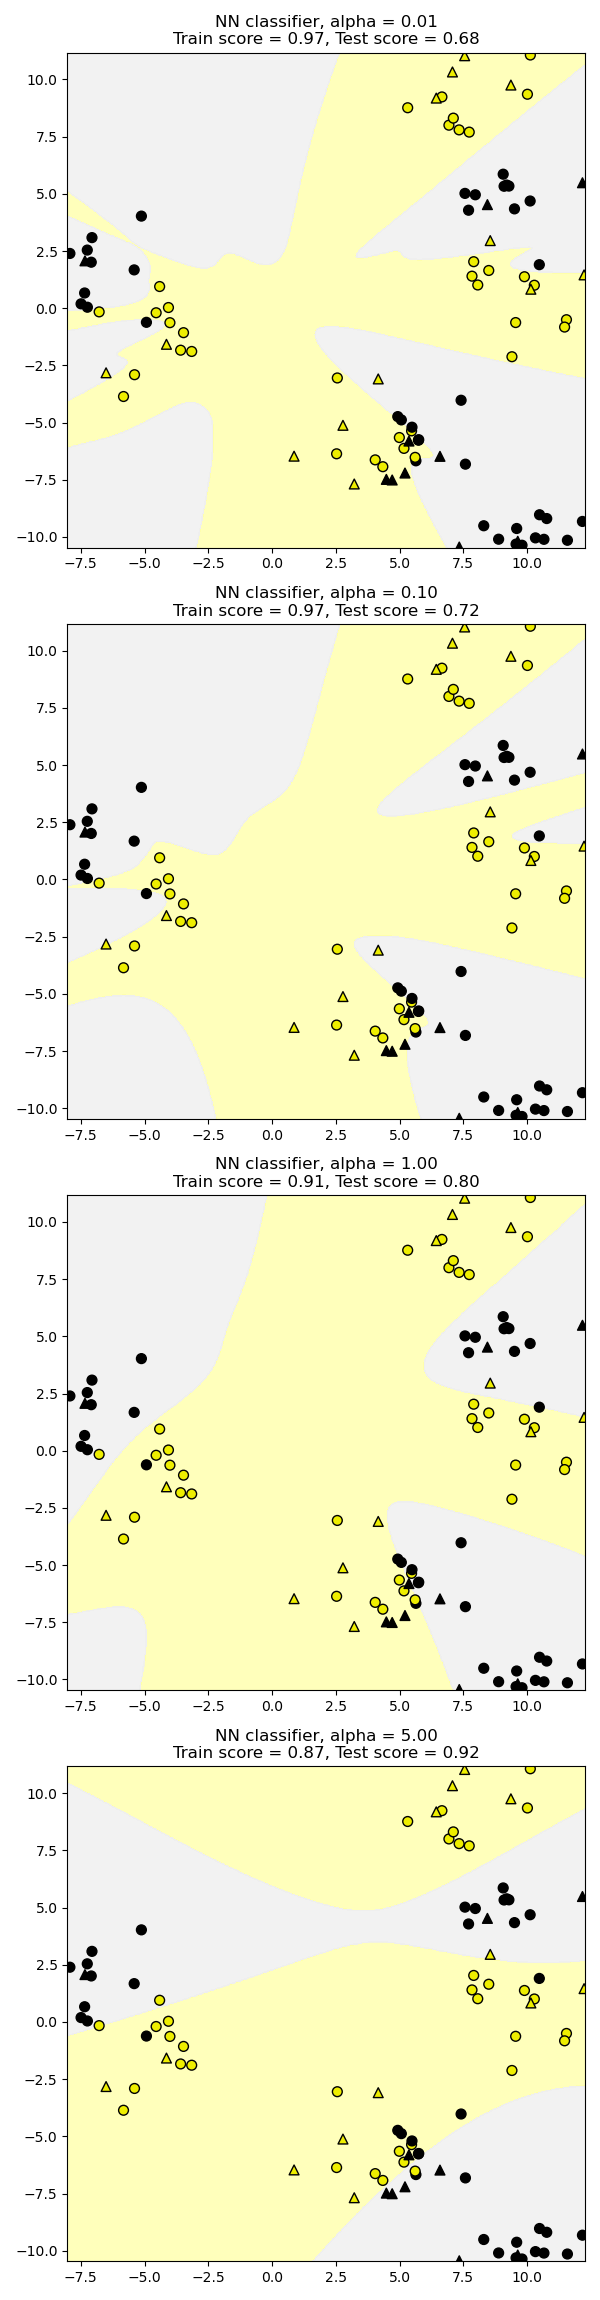

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sajad\AppData\Local\Temp\ipykernel_14108\3732099476.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-pa

In [20]:
fig, subaxes = plt.subplots(4, 1, figsize=(6,23))

for this_alpha, axis in zip([0.01, 0.1, 1, 5], subaxes):
    nnclf = MLPClassifier(solver = 'lbfgs', activation='tanh', alpha = this_alpha,
                          hidden_layer_sizes=[100,100], random_state=0).fit(X_train, y_train)
    title = 'NN classifier, alpha = {:.2f}'.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)
    plt.tight_layout()

#### The effect of different choices of activation function

<IPython.core.display.Javascript object>


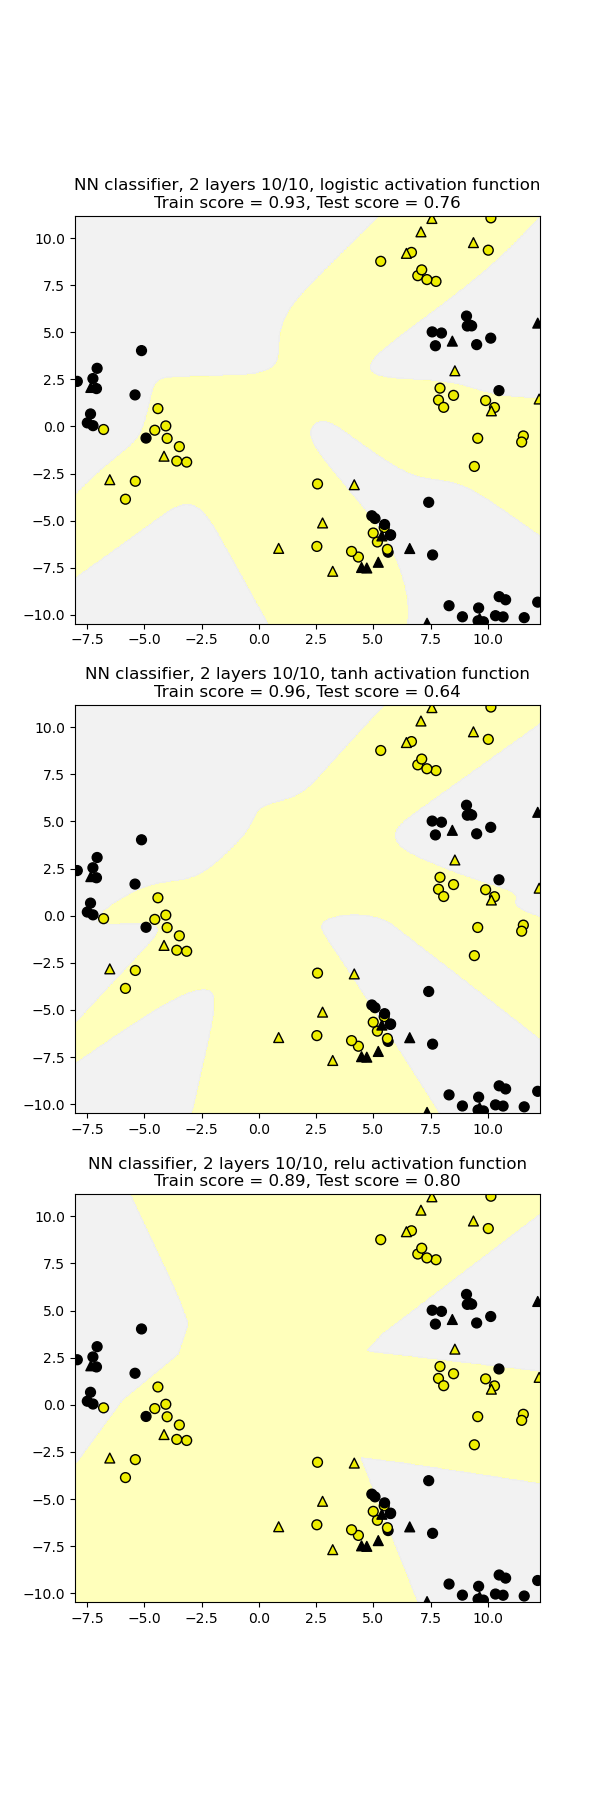

In [26]:
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(max_iter=10000, solver='lbfgs', activation=this_activation, alpha=0.1,
                          hidden_layer_sizes=[10,10]).fit(X_train, y_train)
    
    title = 'NN classifier, 2 layers 10/10, {} activation function'.format(this_activation)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, title, axis)

### NN Regression

<IPython.core.display.Javascript object>


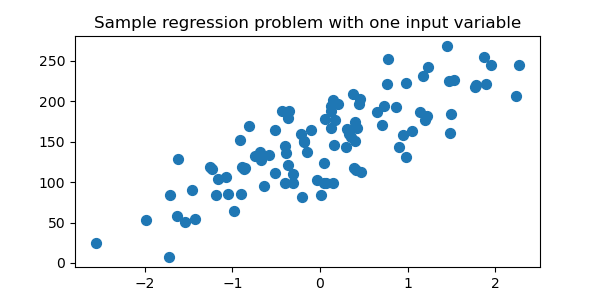

In [30]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure(figsize=(6,3))
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

In [34]:
from sklearn.neural_network import MLPRegressor

<IPython.core.display.Javascript object>


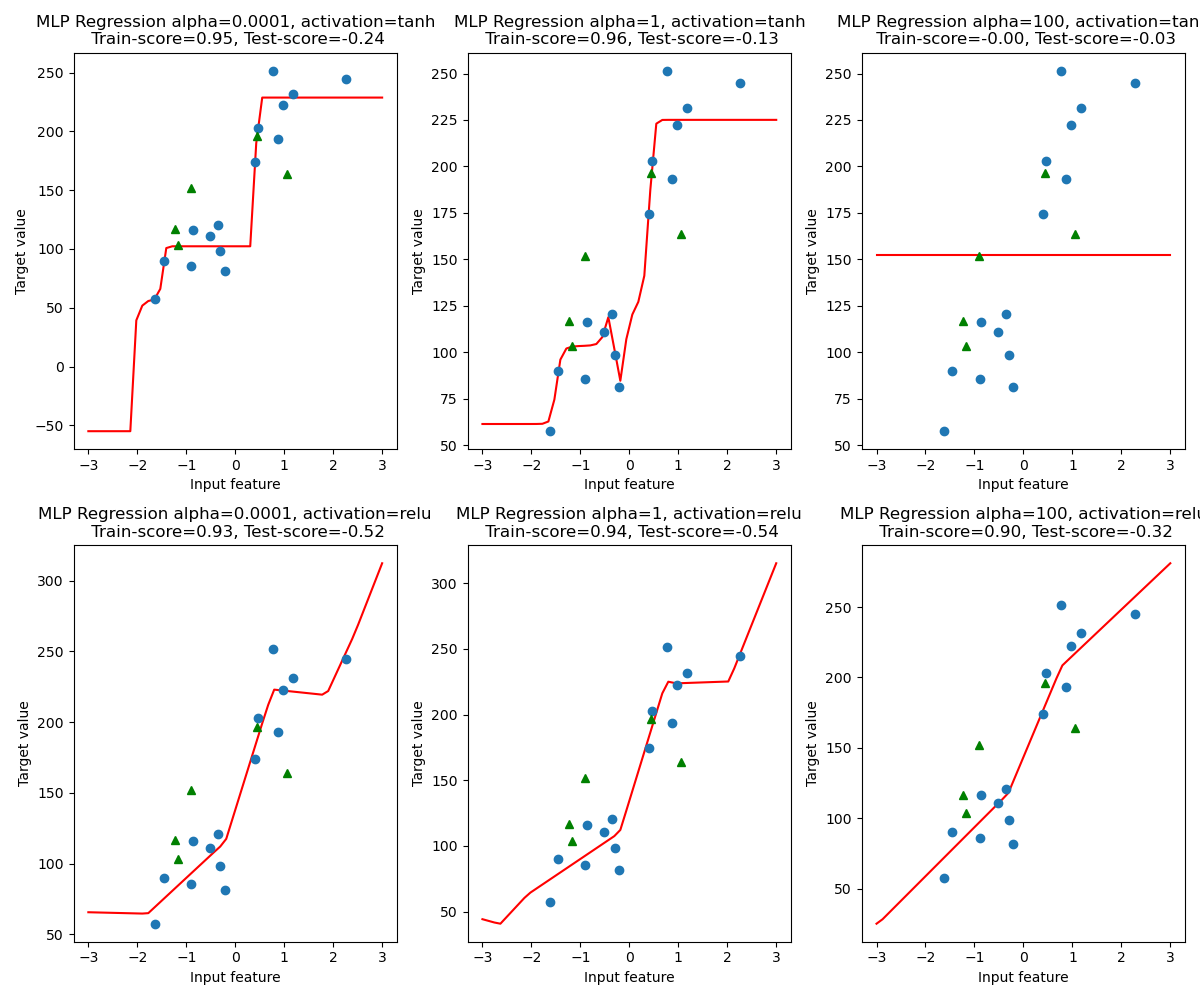

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\sajad\AppData\Local\Temp\ipykernel_14108\1980551837.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sajad\AppData\Local\Temp\i

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)
X_pred = np.linspace(-3, 3, 50).reshape(-1,1)
fig, subaxes = plt.subplots(2, 3, figsize=(12,10))
for this_axisrow, this_activation in zip(subaxes, ['tanh', 'relu']):
    for this_alpha, thisaxis in zip([0.0001, 1, 100], this_axisrow):
        nnreg = MLPRegressor(alpha = this_alpha, activation = this_activation, hidden_layer_sizes = [10,10],
                            solver = 'lbfgs').fit(X_train, y_train)
        y_pred = nnreg.predict(X_pred)
        train_score = nnreg.score(X_train, y_train)
        test_score = nnreg.score(X_test, y_test)
        thisaxis.plot(X_pred, y_pred, color='red')
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.plot(X_test, y_test, '^', c='g')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP Regression alpha={}, activation={}\n Train-score={:.2f}, Test-score={:.2f}'
                           .format(this_alpha, this_activation, train_score, test_score))
        plt.tight_layout()